# I have just started working on this data set. This is a work in progress. You can check my "Chicago crime data analysis" project. I have done comprehensive analysis in that project. Thanks.

# This data set has been obtained from Kaggle. This is the following URL:

https://www.kaggle.com/lislejoem/us_energy_census_gdp_10-14/data

This data set deals with different aspects (viz. economic, energy and census) pertaining to USA. 

# To get an understanding about the columns in the data set, please visit the following URL:
    
https://www.kaggle.com/lislejoem/us_energy_census_gdp_10-14

# Important Note: When viewing this notebook in github directly, the choropleth maps might not be visible. To view those plots in github directly, use this URL:
        
http://nbviewer.jupyter.org/github/bodhisattamaiti25/projects-data-science/blob/master/US_Energy_Economic_Census_Data_Analysis/US_Energy_Economic_Census_Data_Analysis.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab 
import seaborn as sns
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.plotly as py

# Reading the dataset (in csv format) and creating dataframe

In [2]:
energy_economic_census_df = pd.read_csv('Energy Census and Economic Data US 2010-2014.csv')

# Preliminary analysis of the data set

In [3]:
energy_economic_census_df.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaska,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,4.0,8.0,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,3.0,7.0,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406


In [4]:
energy_economic_census_df.shape

(52, 192)

In [110]:
#list(energy_economic_census_df.columns)

In [5]:
energy_economic_census_df.dtypes

StateCodes                object
State                     object
Region                   float64
Division                 float64
Coast                    float64
Great Lakes              float64
TotalC2010                 int64
TotalC2011                 int64
TotalC2012                 int64
TotalC2013                 int64
TotalC2014                 int64
TotalP2010                 int64
TotalP2011                 int64
TotalP2012                 int64
TotalP2013                 int64
TotalP2014                 int64
TotalE2010               float64
TotalE2011               float64
TotalE2012               float64
TotalE2013               float64
TotalE2014               float64
TotalPrice2010           float64
TotalPrice2011           float64
TotalPrice2012           float64
TotalPrice2013           float64
TotalPrice2014           float64
TotalC10-11              float64
TotalC11-12              float64
TotalC12-13              float64
TotalC13-14              float64
          

In [6]:
energy_economic_census_df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'District of Columbia', 'United States'], dtype=object)

# As per today's date 19th Feb, 2018, there are 50 states in USA, extracting the same from the data set

In [7]:
energy_economic_census_df_filtered = energy_economic_census_df[(energy_economic_census_df['State'] != 'District of Columbia') & (energy_economic_census_df['State'] != 'United States')]

In [8]:
energy_economic_census_df_filtered['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

Assigning region names to the states

In [9]:
region_code_name_mapping = {
    1 : 'Northeast', 2 : 'Midwest', 3 : 'South', 4 : 'West'
}
def get_RegionName(cur_region):
    
    return region_code_name_mapping[cur_region]

energy_economic_census_df_filtered['Region Name'] = energy_economic_census_df_filtered['Region'].apply(get_RegionName)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Assigning division names to the states

In [10]:
division_code_name_mapping = {
    1 : 'New England', 
    2 : 'Middle Atlantic', 
    3 : 'East North Central', 
    4 : 'West North Central', 
    5 : 'South Atlantic', 
    6 : 'East South Central', 
    7 : 'West South Central', 
    8 : 'Mountain', 
    9 : 'Pacific'
}
def get_DivisionName(cur_division):
    
    return division_code_name_mapping[cur_division]

energy_economic_census_df_filtered['Division Name'] = energy_economic_census_df_filtered['Division'].apply(get_DivisionName)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [11]:
def process_DataFrameColumnData(feature_name, df=energy_economic_census_df_filtered):
    
    counts_data = df[feature_name].value_counts().to_dict()
    return process_horizontalBarChartData(counts_data.items())
    

In [12]:
def process_horizontalBarChartData(counts_data):
    
    counts_data = sorted(counts_data, key=lambda x:x[1], reverse=True)
    unzip_counts_data = zip(*counts_data)
    yTickLabels = unzip_counts_data[0]
    counts = unzip_counts_data[1]
    
    return yTickLabels, counts

In [13]:
def generate_horizontalBarChart(ax, y_pos, count, color, yTickLabels, xLabel, yLabel, plotTitle, rotation=35):
    
    
    ax.barh(y_pos, count, align='center', color=color)
    ax.set_yticks(y_pos)
    
    ax.set_yticklabels(yTickLabels, fontweight='bold')
    ax.invert_yaxis()  
    ax.set_xlabel(xLabel, fontweight='bold', fontsize=18)
    ax.set_ylabel(yLabel, fontweight='bold', fontsize=18)
    ax.set_title(plotTitle, fontweight='bold')
    
    for cur_tick in ax.get_xticklabels():
        cur_tick.set_rotation(rotation)
        cur_tick.set_fontweight('bold')
    plt.show()

In [14]:
sns.set(font_scale=1.5)

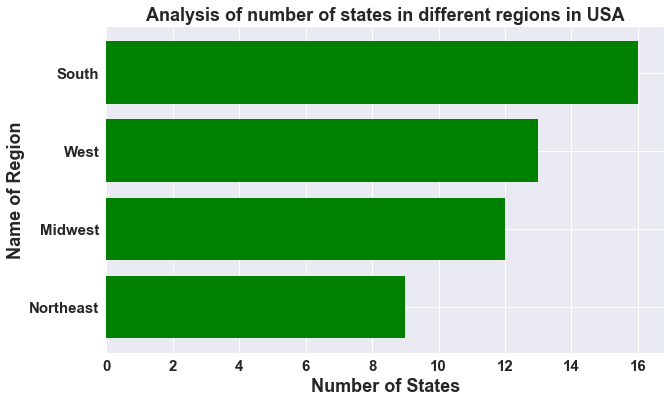

In [15]:
regions, states_count = process_DataFrameColumnData('Region Name')

pylab.rcParams['figure.figsize'] = 10, 6
fig1, ax1 = plt.subplots()
generate_horizontalBarChart(ax1, np.arange(len(regions)), states_count, 'green', regions, 'Number of States', 'Name of Region', 'Analysis of number of states in different regions in USA', 0)

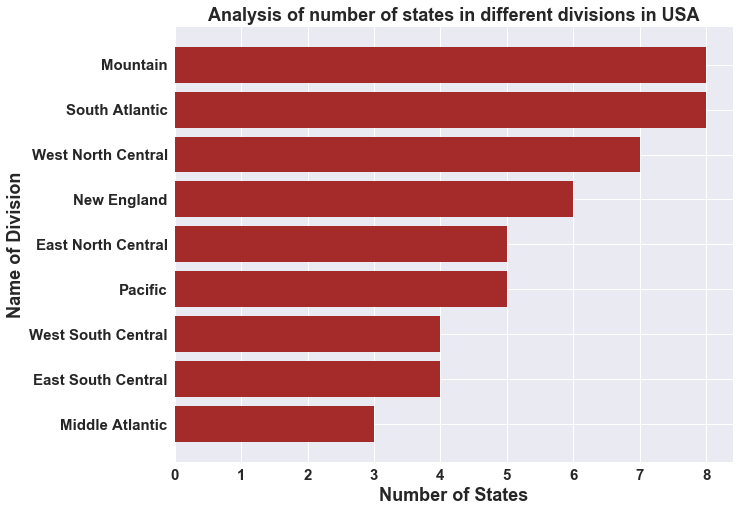

In [16]:
divisions, states_in_division_count = process_DataFrameColumnData('Division Name')

pylab.rcParams['figure.figsize'] = 10, 8
fig2, ax2 = plt.subplots()
generate_horizontalBarChart(ax2, np.arange(len(divisions)), states_in_division_count, 'brown', divisions, 'Number of States', 'Name of Division', 'Analysis of number of states in different divisions in USA', 0)

In [17]:
popestimate_by_division_df = energy_economic_census_df_filtered.groupby(['Division Name'])[["POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", "POPESTIMATE2014"]].sum()

In [18]:
for cur_col in list(popestimate_by_division_df.columns):
    popestimate_by_division_df[cur_col] = popestimate_by_division_df[cur_col]/1e6
    
popestimate_by_division_df['POPESTIMATE_PERCENT_CHANGE_2010_2014'] = ((popestimate_by_division_df['POPESTIMATE2014'] - popestimate_by_division_df['POPESTIMATE2010'])/popestimate_by_division_df['POPESTIMATE2010'])*100

rename_columns = {
    "POPESTIMATE2010": "POPESTIMATE2010 (in Millions)",
    "POPESTIMATE2011": "POPESTIMATE2011 (in Millions)",
    "POPESTIMATE2012": "POPESTIMATE2012 (in Millions)",
    "POPESTIMATE2013": "POPESTIMATE2013 (in Millions)",
    "POPESTIMATE2014": "POPESTIMATE2014 (in Millions)"
} 
popestimate_by_division_df.rename(index=str, columns=rename_columns, inplace=True)
popestimate_by_division_df

,POPESTIMATE2010 (in Millions),POPESTIMATE2011 (in Millions),POPESTIMATE2012 (in Millions),POPESTIMATE2013 (in Millions),POPESTIMATE2014 (in Millions),POPESTIMATE_PERCENT_CHANGE_2010_2014
Division Name,,,,,,
East North Central,46.436241,46.504563,46.571965,46.674416,46.739039,0.652073
East South Central,18.463099,18.548586,18.642263,18.723054,18.806265,1.858659
Middle Atlantic,40.915524,41.108354,41.253183,41.388478,41.471611,1.359110
Mountain,18.639233,18.819480,19.013688,19.222957,19.432004,4.253238
New England,14.466166,14.527316,14.578855,14.639742,14.680722,1.483157
Pacific,49.992811,50.492480,50.981636,51.479449,51.990562,3.996077
South Atlantic,59.329846,59.962489,60.603494,61.203833,61.855722,4.257345
West North Central,20.536149,20.645094,20.759493,20.893455,21.006069,2.288258
West South Central,39.962778,40.492843,41.072461,41.623036,42.216169,5.638725


In [19]:
popestimate2010_vals = []
popestimate2014_vals = []
popestimate_percent_change_vals = []
for cur_division in divisions:
    popestimate2010_vals.append((cur_division, popestimate_by_division_df.get_value(cur_division, 'POPESTIMATE2010 (in Millions)')))
    popestimate2014_vals.append((cur_division, popestimate_by_division_df.get_value(cur_division, 'POPESTIMATE2014 (in Millions)')))
    popestimate_percent_change_vals.append((cur_division, popestimate_by_division_df.get_value(cur_division, 'POPESTIMATE_PERCENT_CHANGE_2010_2014')))

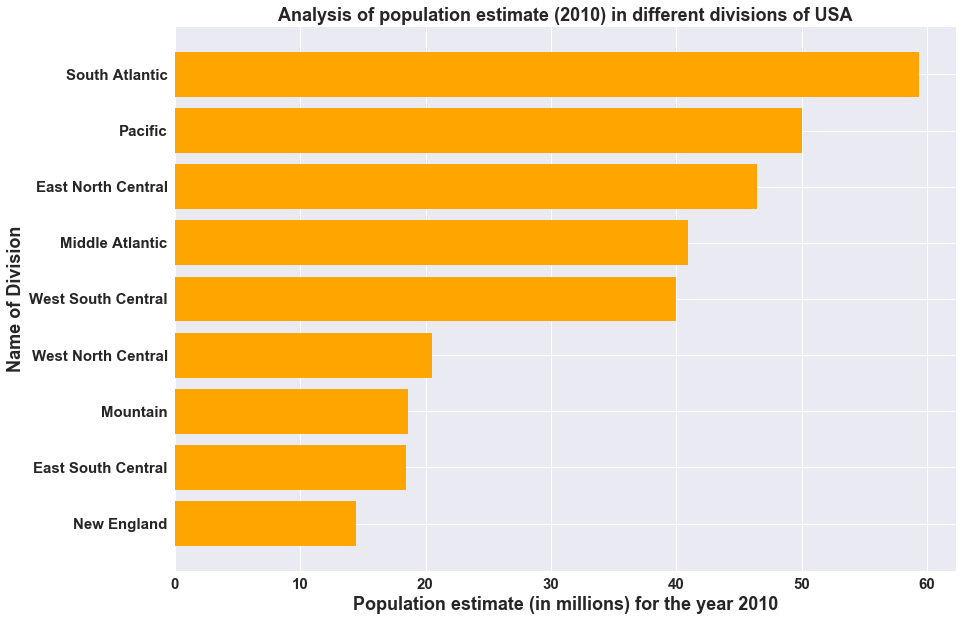

In [21]:
divisions_popestimate2010, popestimate2010_in_division_val = process_horizontalBarChartData(popestimate2010_vals)

pylab.rcParams['figure.figsize'] = 14, 10
fig3, ax3 = plt.subplots()
generate_horizontalBarChart(ax3, np.arange(len(divisions_popestimate2010)), popestimate2010_in_division_val, 'orange', divisions_popestimate2010, 'Population estimate (in millions) for the year 2010', 'Name of Division', 'Analysis of population estimate (2010) in different divisions of USA', 0)

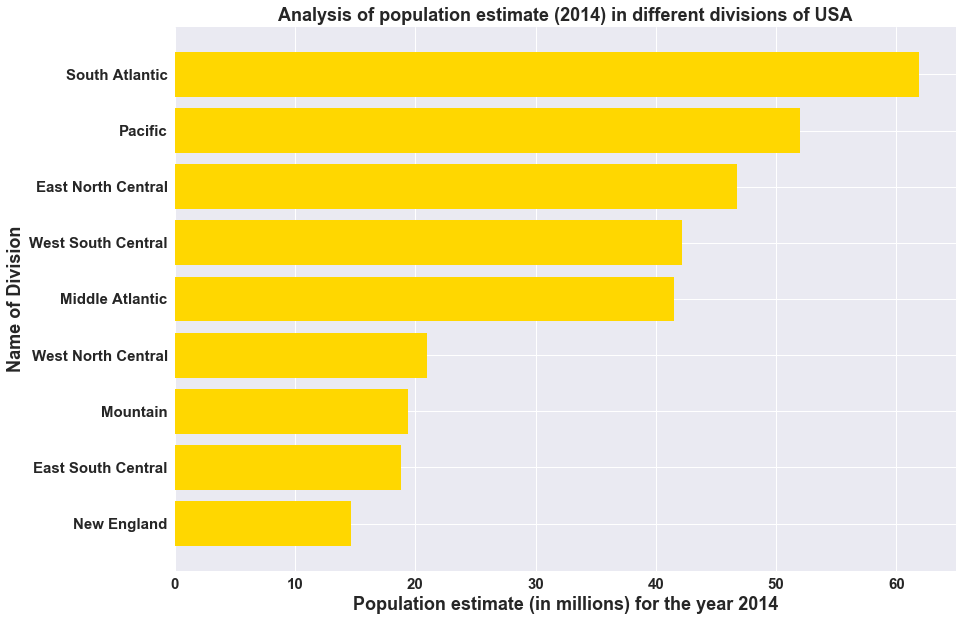

In [22]:
divisions_popestimate2014, popestimate2014_in_division_val = process_horizontalBarChartData(popestimate2014_vals)

pylab.rcParams['figure.figsize'] = 14, 10
fig4, ax4 = plt.subplots()
generate_horizontalBarChart(ax4, np.arange(len(divisions_popestimate2014)), popestimate2014_in_division_val, 'gold', divisions_popestimate2014, 'Population estimate (in millions) for the year 2014', 'Name of Division', 'Analysis of population estimate (2014) in different divisions of USA', 0)

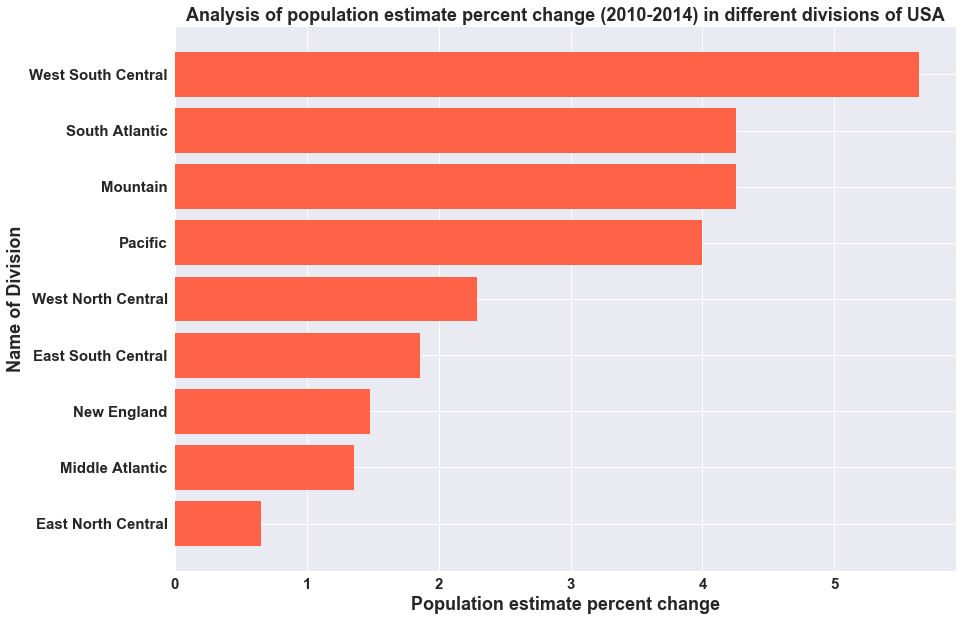

In [23]:
divisions_popestimate_percent_change, popestimate_percent_change_in_division_val = process_horizontalBarChartData(popestimate_percent_change_vals)

pylab.rcParams['figure.figsize'] = 14, 10
fig5, ax5 = plt.subplots()
generate_horizontalBarChart(ax5, np.arange(len(divisions_popestimate_percent_change)), popestimate_percent_change_in_division_val, '#ff6347', divisions_popestimate_percent_change, 'Population estimate percent change', 'Name of Division', 'Analysis of population estimate percent change (2010-2014) in different divisions of USA', 0)

In [24]:
import matplotlib.dates as mdates

In [25]:
def generate_stackplot(ax, df, ylabel, plotTitle, colors=['red', 'blue', 'green', 'brown', 'orange', 'cyan', 'grey', 'tomato', 'yellow']):
    years = mdates.YearLocator() 
    yearsFormat = mdates.DateFormatter('%Y')
    data_for_stackplot = []
    columns = list(df.columns)
    items = list(df.index)
    for cur_item in items:
        cur_item_data = []
        for cur_col in columns:
            cur_item_data.append(df.get_value(cur_item, cur_col))
        data_for_stackplot.append(cur_item_data)
    
    #print(data_for_stackplot)
    ax.stackplot(np.arange('2010', '2015', dtype='datetime64[Y]'), data_for_stackplot, labels=items, colors=colors)
    ax.legend(loc=2)
    ax.set_xlabel('Year')
    ax.set_ylabel(ylabel)
    ax.set_title(plotTitle)
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFormat)
    plt.show()


In [26]:
popestimate_df_copy = popestimate_by_division_df.copy()
popestimate_df_copy.drop(['POPESTIMATE_PERCENT_CHANGE_2010_2014'], axis=1, inplace=True)
popestimate_df_copy

,POPESTIMATE2010 (in Millions),POPESTIMATE2011 (in Millions),POPESTIMATE2012 (in Millions),POPESTIMATE2013 (in Millions),POPESTIMATE2014 (in Millions)
Division Name,,,,,
East North Central,46.436241,46.504563,46.571965,46.674416,46.739039
East South Central,18.463099,18.548586,18.642263,18.723054,18.806265
Middle Atlantic,40.915524,41.108354,41.253183,41.388478,41.471611
Mountain,18.639233,18.819480,19.013688,19.222957,19.432004
New England,14.466166,14.527316,14.578855,14.639742,14.680722
Pacific,49.992811,50.492480,50.981636,51.479449,51.990562
South Atlantic,59.329846,59.962489,60.603494,61.203833,61.855722
West North Central,20.536149,20.645094,20.759493,20.893455,21.006069
West South Central,39.962778,40.492843,41.072461,41.623036,42.216169


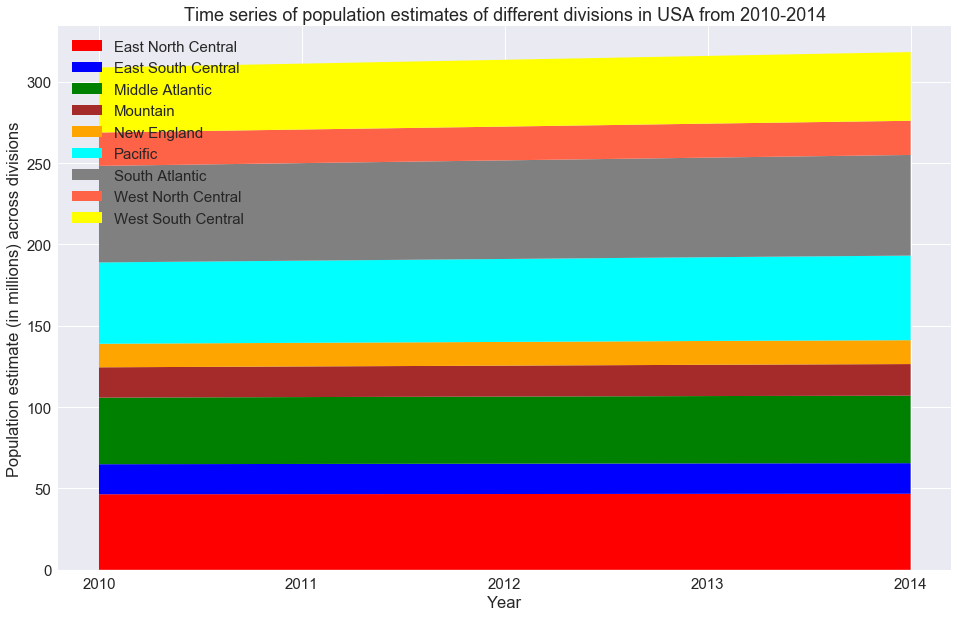

In [27]:
pylab.rcParams['figure.figsize'] = 16, 10
fig6, ax6 = plt.subplots()
generate_stackplot(ax6, popestimate_df_copy, 'Population estimate (in millions) across divisions', 'Time series of population estimates of different divisions in USA from 2010-2014')

# To understand how to plot a choropleth map, please visit the following URL: 

https://plot.ly/python/choropleth-maps/

In [28]:
default_scale = [[0.0, '#add8e6'],[0.2, '#ffdab9'],\
       [0.4, '#d79f67'],[0.6, '#808000'],\
       [0.8, '#4682b4'], [1.0, '#cd5c5c']]

In [29]:
def generate_choropleth_map_usa(feature, colorbarTitle, plotTitle, tooltipText, filename, df=energy_economic_census_df_filtered, colorscale=default_scale):
    
    data = [ dict(
            type='choropleth',
            colorscale = colorscale,
            autocolorscale = False,
            locations = df['StateCodes'],
            z = df[feature].astype(float),
            locationmode = 'USA-states',
            text = tooltipText,
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title = colorbarTitle)
            ) ]

    layout = dict(
            title = plotTitle+'<br>(Hover over chart for further information)',
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict( data=data, layout=layout )
    init_notebook_mode(connected=True)
    iplot(fig)
    
    '''
        currently if someone wants to view the notebook from github, the choropleth maps are not visible due to
        limited rendering. We are generating the html file of the plot, so that the user can alternatively view 
        the plot from the html file. This is a workaround.
    '''
    plotly.offline.plot(fig, filename='html-output-files/'+filename)
    

In [30]:
energy_economic_census_df_filtered['basic tooltip text'] = energy_economic_census_df_filtered['State'] + '<br>' +\
            'Region: ' + energy_economic_census_df_filtered['Region Name'] + '<br>' +\
            'Division: ' + energy_economic_census_df_filtered['Division Name'] + '<br>'

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [31]:
generate_choropleth_map_usa('POPESTIMATE2014', 'Population estimate', 'Population estimate in the year 2014', energy_economic_census_df_filtered['basic tooltip text'], 'popestimate_2014.html')

# If you are viewing the notebook directly from github, there are chances that the choropleth map might not be visible due to limited rendering, to view the plot visit the following URL:


http://htmlpreview.github.io/?https://github.com/bodhisattamaiti25/projects-data-science/blob/master/US_Energy_Economic_Census_Data_Analysis/html-output-files/popestimate_2014.html

In [32]:
popestimate2014 = energy_economic_census_df_filtered['POPESTIMATE2014']
popestimate2010 = energy_economic_census_df_filtered['POPESTIMATE2010']
energy_economic_census_df_filtered['POPESTIMATE_PERCENT_CHANGE_2010_2014'] = ((popestimate2014 - popestimate2010)/popestimate2010)*100

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [33]:
generate_choropleth_map_usa('POPESTIMATE_PERCENT_CHANGE_2010_2014', 'Population Estimate % Change', 'Population estimate % change from the year 2010 to 2014', energy_economic_census_df_filtered['basic tooltip text'], 'popestimate_percent_change_2010_14.html')

# If you are viewing the notebook directly from github, there are chances that the choropleth map might not be visible due to limited rendering, to view the plot visit the following URL:

http://htmlpreview.github.io/?https://github.com/bodhisattamaiti25/projects-data-science/blob/master/US_Energy_Economic_Census_Data_Analysis/html-output-files/popestimate_percent_change_2010_14.html

In [34]:
energySourcesConsumption_2014 = ['BiomassC2014', 'CoalC2014', 'ElecC2014', 'FossFuelC2014', 'GeoC2014', 'HydroC2014', 'NatGasC2014', 'LPGC2014']

calculating per capita consumption of these energy sources in 2014

In [35]:
energy_sources_data = []
ener_econ_cen_df = energy_economic_census_df_filtered

for cur_energysource in energySourcesConsumption_2014:
    #initially converting energy unit BTU (in billions) to millions
    ener_econ_cen_df[cur_energysource] = ener_econ_cen_df[cur_energysource]*1000
    ener_econ_cen_df[cur_energysource+'_percapita'] = ener_econ_cen_df[cur_energysource].astype('float')/ener_econ_cen_df['POPESTIMATE2014']
    temp_df = pd.DataFrame() 
    temp_df['energy_consumption_per_capita'] = ener_econ_cen_df[cur_energysource+'_percapita']
    temp_df['energy_source_type'] = cur_energysource[:-5]
    energy_sources_data.append(temp_df)
    
energy_source_2014_df = pd.concat(energy_sources_data)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [36]:
ener_econ_cen_df.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,basic tooltip text,POPESTIMATE_PERCENT_CHANGE_2010_2014,BiomassC2014_percapita,CoalC2014_percapita,ElecC2014_percapita,FossFuelC2014_percapita,GeoC2014_percapita,HydroC2014_percapita,NatGasC2014_percapita,LPGC2014_percapita
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,Alabama<br>Region: South<br>Division: East Sou...,1.327985,38.489274,118.759997,63.671065,355.693319,0.029076,18.565271,134.353753,1.744554
1,AK,Alaska,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,Alaska<br>Region: West<br>Division: Pacific<br>,3.204568,7.432825,24.737625,28.550409,789.118703,0.252466,19.862039,447.360777,1.615241
2,AZ,Arizona,4.0,8.0,0.0,0.0,1383531,1424944,1395839,1414383,...,Arizona<br>Region: West<br>Division: Mountain<br>,1.508129,10.612638,150.975486,87.759817,423.607784,0.116304,19.614889,106.341457,2.485530
3,AR,Arkansas,3.0,7.0,0.0,0.0,1120632,1122544,1067642,1096438,...,Arkansas<br>Region: South<br>Division: West So...,4.982612,14.255846,50.392157,23.863683,139.610820,0.120033,3.729341,40.818191,1.358541
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,California<br>Region: West<br>Division: Pacifi...,3.927814,7.692107,1.017615,23.089724,146.960067,3.021094,4.051620,62.302068,1.326512


In [37]:
energy_source_2014_df.rename(columns={'energy_consumption_per_capita':'Energy Consumption per Capita BTU(in millions)', 'energy_source_type':'Energy Source Type'}, inplace=True)
energy_source_2014_df.head()

,Energy Consumption per Capita BTU(in millions),Energy Source Type
0,38.489274,Biomass
1,7.432825,Biomass
2,10.612638,Biomass
3,14.255846,Biomass
4,7.692107,Biomass


In [38]:
def generate_boxplot(x, y, data, title):
    sns.boxplot(x=x, y=y, data=data).set_title(title)
    plt.show()

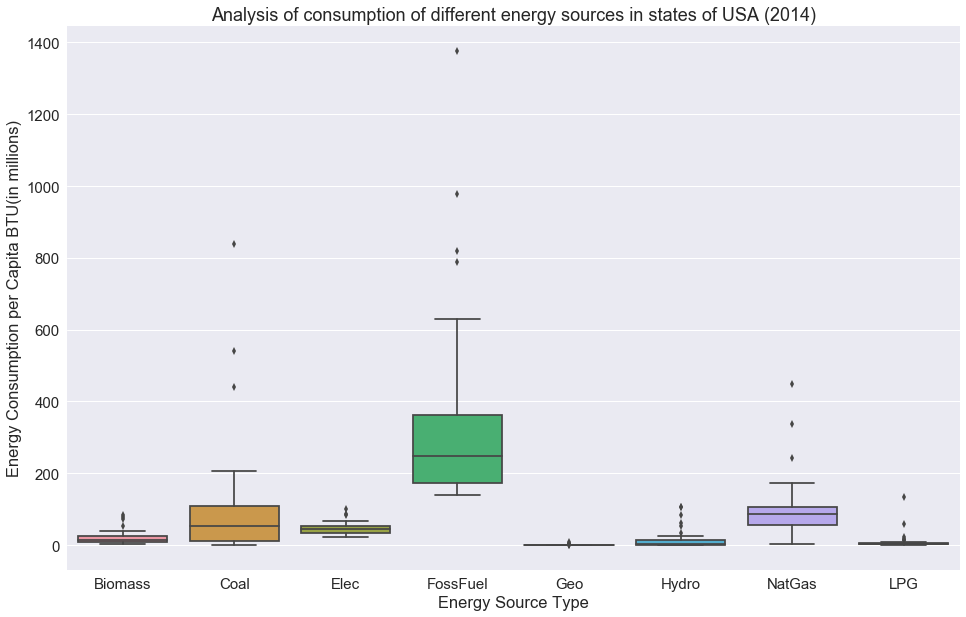

In [39]:
generate_boxplot('Energy Source Type', 'Energy Consumption per Capita BTU(in millions)', energy_source_2014_df, 'Analysis of consumption of different energy sources in states of USA (2014)')